In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config IPCompleter.greedy = True
!pwd

/kaggle/working


In [3]:
# Predictive Models

from sklearn import svm, tree, ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Additional
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# DataViz
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_all = concat_df(train_data, test_data)
dfs = [train_data, test_data]

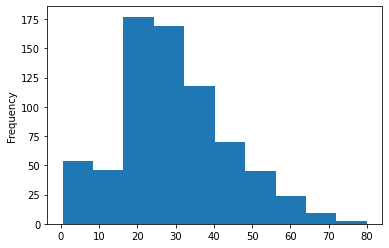

In [7]:
train_data['Age'].plot(kind='hist')

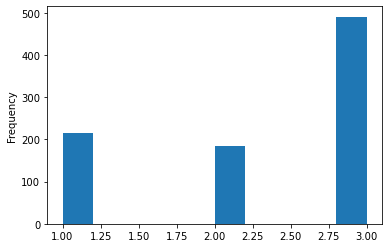

In [8]:
train_data['Pclass'].plot(kind='hist')

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Burke, Mr. Jeremiah",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [12]:
print("Missings in the train data:")
display(train_data.isnull().sum())
print("------------------------------")
print("Missings in the test data:")
display(test_data.isnull().sum())

Missings in the train data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

------------------------------
Missings in the test data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
print('Median for Age seperated by Pclass:')
display(train_data.groupby('Pclass')['Age'].median())
print('Median for Age seperated by Pclass and Sex:')
display(train_data.groupby(['Pclass','Sex'])['Age'].median())
print('Number of cases:')
display(train_data.groupby(['Pclass','Sex'])['Age'].count())

Median for Age seperated by Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for Age seperated by Pclass and Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Number of cases:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [14]:
#replace the missings values with the medians of each group
df_all['Age'] = df_all.groupby(['Pclass' , 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [15]:
df_all.loc[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [16]:
#loc cases which are similiar to Mr. Thomas and use the median of fare to replace the missing for his data set
mr_thomas = df_all.loc[(df_all['Pclass'] == 3) & (df_all['SibSp'] == 0) & (df_all['Embarked'] == 'S')]['Fare'].median()
print(mr_thomas)

df_all.loc[df_all['Fare'].isnull(), 'Fare'] = mr_thomas

7.925


In [17]:
display(train_data['Cabin'].unique())
print("There are " + str(train_data['Cabin'].nunique()) + " different values for Cabin and " + str(train_data['Cabin'].isnull().sum()) + " cases are missing.")

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

There are 147 different values for Cabin and 687 cases are missing.


Text(0.5, 0.98, 'Surivva1 rates for different cabines')

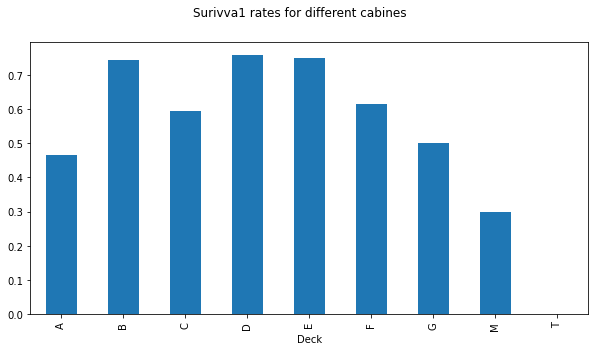

In [18]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar', figsize=(10,5))
plt.suptitle('Surivva1 rates for different cabines')

In [19]:
idx = df_all[df_all['Deck'] == 'T'].index

df_all.loc[idx, 'Deck'] = 'A'

df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')
df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [20]:
df_all.loc[df_all['Embarked'].isnull()]

#check for passengers who were in passenger class 1. on deck abc and paid 88 or less for the tickets
df_all.loc[(df_all['Pclass'] == 1) & (df_all['Fare'] <= 86) & (df_all['Deck'] == 'ABC')]['Embarked'].value_counts()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


S    57
C    45
Name: Embarked, dtype: int64

In [21]:
df_all.loc[df_all['Embarked'].isnull(), 'Embarked'] = 'S'

In [22]:
print("Missings in the data:")
display(df_all.isnull().sum())

Missings in the data:


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

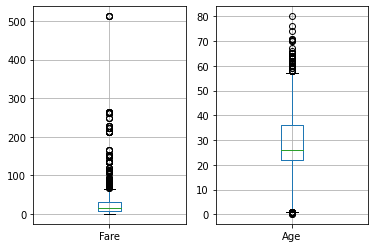

In [23]:
fig, axs = plt.subplots(1,2)

df_all.boxplot(ax=axs[0], column=['Fare'], figsize=(15,7))
df_all.boxplot(ax=axs[1], column=['Age'], figsize=(15,7))

In [24]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 5)
df_all['Age'] = pd.cut(df_all['Age'].astype(int), 5)

print("For age, each category has a different number of cases:")
display(df_all['Age'].value_counts())

print("For fare, each category has nearly a same number of cases:")
display(df_all['Fare'].value_counts())

display(df_all[['Age','Survived']].groupby('Age')['Survived'].mean())

display(df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean())

For age, each category has a different number of cases:


(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age, dtype: int64

For fare, each category has nearly a same number of cases:


(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(10.5, 21.558]       255
(7.854, 10.5]        255
Name: Fare, dtype: int64

Age
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.558]       0.426901
(21.558, 41.579]     0.443243
(41.579, 512.329]    0.645349
Name: Survived, dtype: float64

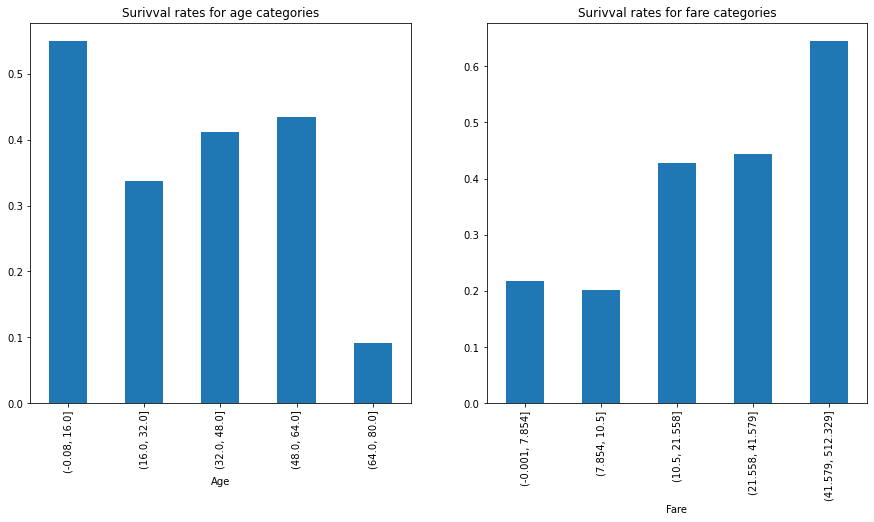

In [25]:
fig2, axs2 = plt.subplots(1,2)

df_all[['Age','Survived']].groupby('Age')['Survived'].mean().plot(ax=axs2[0], kind='bar', figsize=(15,7))
axs2[0].title.set_text('Surivval rates for age categories')

df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot(ax=axs2[1], kind='bar', figsize=(15,7))
axs2[1].title.set_text('Surivval rates for fare categories')

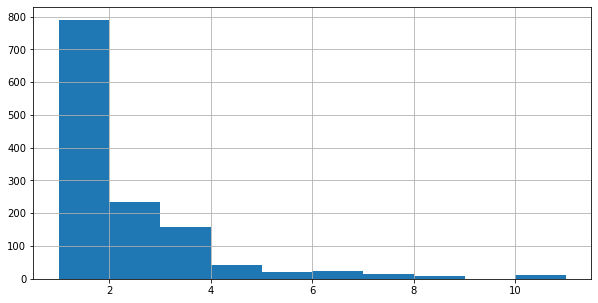

In [26]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all['Family_Size'].hist(figsize=(10,5))

In [27]:
df_all['Family_Size_bin'] = df_all['Family_Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0))))
df_all['Family_Size_bin'].value_counts()

1    790
2    235
3    202
4     82
Name: Family_Size_bin, dtype: int64

Text(0.5, 0.98, 'Surivval rates for family size categories')

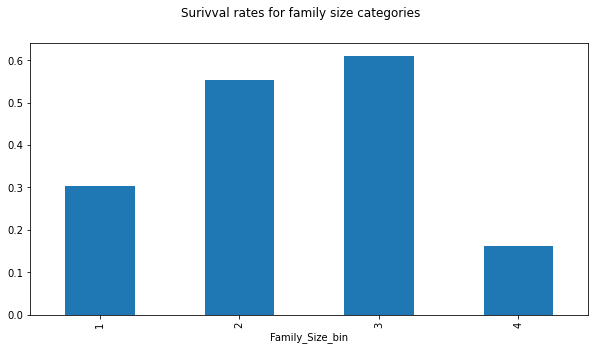

In [28]:
df_all[['Family_Size_bin','Survived']].groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar', figsize=(10,5))
plt.suptitle('Surivval rates for family size categories')

In [29]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

df_all[['Ticket_Frequency','Survived']].groupby('Ticket_Frequency').mean()

,Survived
Ticket_Frequency,
1,0.270270
2,0.513812
3,0.653465
4,0.727273
5,0.333333
6,0.210526
7,0.208333
8,0.384615
11,0.000000


In [30]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

df_all['Title'].nunique()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


18

In [31]:
title_names = (df_all['Title'].value_counts() < 10)
df_all['Title'] = df_all['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
df_all.groupby('Title')['Title'].count()

Title
Master     61
Misc       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

In [32]:
import string
def extract_surname(data):
    families = []
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
    return families

df_all['Family'] = extract_surname(df_all['Name'])

df_all['Family'].nunique()

875

In [33]:
df_all[['Title','Survived','Family_Size']].groupby('Title').mean()

,Survived,Family_Size
Title,,
Master,0.575000,4.426230
Misc,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


Survival rates grouped by families of women in dataset:


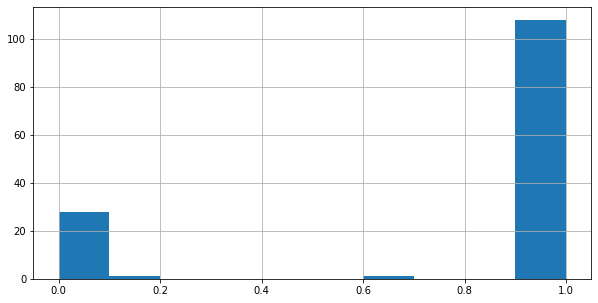

In [34]:
print("Survival rates grouped by families of women in dataset:")
df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean().hist(figsize=(10,5))

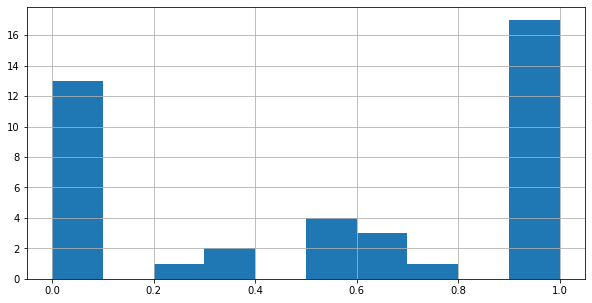

In [35]:
master_families = df_all.loc[df_all['Title'] == 'Master']['Family'].tolist()
df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean().hist(figsize=(10,5))

In [36]:
#Create variables with the survival rate of the women and masters titles

women_rate = df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean()
master_rate = df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()

#Combine both series

combined_rate = women_rate.append(master_rate)

#It is possible that a women has the family as a master and vice versa, so duplicates have to been dropped
combined_rate_df = combined_rate.to_frame().reset_index().rename(columns={'Survived':'Survival_quota'}).drop_duplicates(subset='Family')
#Merge the new dataframe

df_all = pd.merge(df_all,combined_rate_df, how='left')

#We have calculated a survival rate for only a part of the cases, the other cases we set to 9 in the dummy variable
df_all['Survival_quota_NA'] = 1

df_all.loc[df_all['Survival_quota'].isnull(), 'Survival_quota_NA'] = 0

df_all['Survival_quota'] = df_all['Survival_quota'].fillna(0)

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

non_numeric_features = ['Embarked', 'Sex', 'Title', 'Age', 'Fare', 'Deck']

for feature in non_numeric_features:
    df_all[feature] = LabelEncoder().fit_transform(df_all[feature])

cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family_Size_bin','Age','Fare']
encoded_features = []

for feature in cat_features:
    encoded_feat = OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1, 1)).toarray()
    n = df_all[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_all.index
    encoded_features.append(encoded_df)

df_all = pd.concat([df_all, *encoded_features], axis=1)

In [38]:
df_train, df_test = divide_df(df_all)

In [39]:
# iterating the columns 
for col in df_train.columns: 
    print(col) 

Age
Cabin
Embarked
Fare
Name
Parch
PassengerId
Pclass
Sex
SibSp
Survived
Ticket
Deck
Family_Size
Family_Size_bin
Ticket_Frequency
Title
Is_Married
Family
Survival_quota
Survival_quota_NA
Pclass_1
Pclass_2
Pclass_3
Sex_1
Sex_2
Embarked_1
Embarked_2
Embarked_3
Title_1
Title_2
Title_3
Title_4
Title_5
Deck_1
Deck_2
Deck_3
Deck_4
Family_Size_bin_1
Family_Size_bin_2
Family_Size_bin_3
Family_Size_bin_4
Age_1
Age_2
Age_3
Age_4
Age_5
Fare_1
Fare_2
Fare_3
Fare_4
Fare_5


In [40]:
corr=df_train.corr().sort_values(by='Survived',ascending=False).round(2)
print(corr['Survived'])

Survived             1.00
Sex_1                0.54
Survival_quota       0.45
Title_5              0.34
Is_Married           0.34
Title_3              0.33
Fare                 0.32
Pclass_1             0.29
Fare_5               0.26
Survival_quota_NA    0.24
Deck_2               0.21
Deck_1               0.20
Family_Size_bin_3    0.19
Embarked_1           0.17
Family_Size_bin_2    0.16
Age_1                0.12
Family_Size_bin      0.11
Pclass_2             0.09
Title_1              0.09
Parch                0.08
Ticket_Frequency     0.06
Fare_4               0.06
Deck_3               0.06
Fare_3               0.04
Age_3                0.03
Age_4                0.03
Title_2              0.02
Family_Size          0.02
Embarked_2           0.00
PassengerId         -0.01
SibSp               -0.04
Age                 -0.04
Age_5               -0.07
Title               -0.08
Age_2               -0.11
Family_Size_bin_4   -0.13
Embarked_3          -0.15
Embarked            -0.17
Fare_1      

In [41]:
df_train.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Age_1,Age_2,Age_3,Age_4,Age_5,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5
0,1,NaN,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,C85,0,4,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,NaN,2,1,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,C123,2,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,NaN,2,1,"Allen, Mr. William Henry",0,5,3,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1,NaN,1,1,"Moran, Mr. James",0,6,3,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,3,E46,2,4,"McCarthy, Mr. Timothy J",0,7,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0,NaN,2,2,"Palsson, Master. Gosta Leonard",1,8,3,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1,NaN,2,2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0,NaN,0,3,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Define columns which can be dropped for the modelling part because we created new label and one hot encoded variants out of them


#drop_cols = ["Age","Survived","Cabin","Embarked","Fare","Name","Parch","PassengerId","Pclass","Sex","SibSp","Ticket","Deck","Family_Size","Family_Size_bin","Ticket_Frequency","Title","Is_Married","Family","Survival_quota","Survival_quota_NA","Pclass_1","Pclass_2","Pclass_3","Sex_1","Sex_2","Embarked_1","Embarked_2","Embarked_3","Title_1","Title_2","Title_3","Title_4","Title_5","Deck_1","Deck_2","Deck_3","Deck_4","Family_Size_bin_1","Family_Size_bin_2","Family_Size_bin_3","Family_Size_bin_4","Age_1","Age_2","Age_3","Age_4","Age_5","Fare_1","Fare_2","Fare_3","Fare_4","Fare_5"]


#drop_cols_2 = ["Cabin","Embarked","Fare","Name","Parch","PassengerId","Pclass","Sex","SibSp","Ticket","Deck","Family_Size","Family_Size_bin","Ticket_Frequency","Title","Is_Married","Family","Survival_quota","Survival_quota_NA","Pclass_1","Pclass_2","Pclass_3","Sex_1","Sex_2","Embarked_1","Embarked_2","Embarked_3","Title_1","Title_2","Title_3","Title_4","Title_5","Deck_1","Deck_2","Deck_3","Deck_4","Family_Size_bin_1","Family_Size_bin_2","Family_Size_bin_3","Family_Size_bin_4","Age_1","Age_2","Age_3","Age_4","Age_5","Fare_1","Fare_2","Fare_3","Fare_4","Fare_5"]


drop_cols = ['Embarked', 'Family', 'Family_Size', 'Survived', 'Family_Size_bin', 'Deck', 'Age', 
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

drop_cols_2 = ['Embarked', 'Family', 'Family_Size', 'Family_Size_bin', 'Deck', 'Age',
               'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

#standardization of the variables
X = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y = df_train['Survived'].values

X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols_2))


#creating train, test splits
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42)

display(np.any(np.isnan(X_train)))
display(np.all(np.isfinite(X_train)))

np.savetxt('X_train.csv', X_train, delimiter=',')

#defining model parameters
model = RandomForestClassifier(criterion='gini',
                            n_estimators=500,
                            max_depth=6,
                            min_samples_split=6,
                            min_samples_leaf=6,
                            max_features='auto',
                            oob_score=True,
                            random_state=42,
                            n_jobs=-1,
                            verbose=1)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(model.score(X_test1, y_test1))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('Submission_1.csv', index=False)

False

True

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished


0.874439461883408


In [51]:
#Try an ensamble

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=1)
xbo_clf = XGBClassifier(learning_rate = 0.05, n_estimators=500, max_depth=5)
ada_clf = AdaBoostClassifier()
svc_clf = SVC(probability=True)
knc_clf = KNeighborsClassifier(n_neighbors = 4)


voting_clf = VotingClassifier(
    estimators=
    [
        ('lr', log_clf),
        ('rf', rnd_clf), 
        ('xbo',xbo_clf), 
        ('svc',svc_clf), 
        ('ada',ada_clf)
    ],
    voting='soft')


# Fit the model

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=6,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('xbo',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_ra...,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=No

In [52]:
for clf in (log_clf, rnd_clf, xbo_clf, svc_clf, ada_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test1)
    predictions = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test1, y_pred))

LogisticRegression(random_state=42)

LogisticRegression 0.8609865470852018


RandomForestClassifier(max_depth=6, n_estimators=500, random_state=1)

RandomForestClassifier 0.8699551569506726


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier 0.8654708520179372


SVC(probability=True)

SVC 0.8654708520179372


AdaBoostClassifier()

AdaBoostClassifier 0.8654708520179372


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=6,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('xbo',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.05,
                                            max_delta_step=0, max_depth=5,
                                            min_child_weight=1, missing=nan

VotingClassifier 0.8699551569506726


In [45]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('Submission_2.csv', index=False)

In [46]:
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix, precision_score, recall_score, f1_score, classification_report

y_pred_test = model.predict(X_test1)

# Building the ROC Curve and Confusion Matrix
#print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test1, y_pred_test))

print("\nClassification Report\n")
print(classification_report(y_test1, y_pred_test))

print("\nConfusion Matrix\n")
print('[[True Positive    False Positive]\n[False Negative    True Negative]]\n')
print(confusion_matrix(y_test1, y_pred_test))

fpr, tpr, _ = roc_curve(y_test1, y_pred_test)
roc_auc = auc(fpr, tpr)
print("\nROC AUC on evaluation set",roc_auc )

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


Testing accuracy:  0.874439461883408

Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       134
         1.0       0.90      0.78      0.83        89

    accuracy                           0.87       223
   macro avg       0.88      0.86      0.87       223
weighted avg       0.88      0.87      0.87       223


Confusion Matrix

[[True Positive    False Positive]
[False Negative    True Negative]]

[[126   8]
 [ 20  69]]

ROC AUC on evaluation set 0.8577897031695455


In [47]:
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix, precision_score, recall_score, f1_score, classification_report

y_pred_test = clf.predict(X_test1)

# Building the ROC Curve and Confusion Matrix
#print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test1, y_pred_test))

print("\nClassification Report\n")
print(classification_report(y_test1, y_pred_test))

print("\nConfusion Matrix\n")
print('[[True Positive    False Positive]\n[False Negative    True Negative]]\n')
print(confusion_matrix(y_test1, y_pred_test))

fpr, tpr, _ = roc_curve(y_test1, y_pred_test)
roc_auc = auc(fpr, tpr)
print("\nROC AUC on evaluation set",roc_auc )

Testing accuracy:  0.8609865470852018

Classification Report

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       134
         1.0       0.85      0.80      0.82        89

    accuracy                           0.86       223
   macro avg       0.86      0.85      0.85       223
weighted avg       0.86      0.86      0.86       223


Confusion Matrix

[[True Positive    False Positive]
[False Negative    True Negative]]

[[121  13]
 [ 18  71]]

ROC AUC on evaluation set 0.8503689418078149
